In [1]:
# stamp_viewer env
import numpy as np
import matplotlib.pyplot as plt

In [3]:
results = np.load("results2d_PFB.npy") # (n_ints, snr, repetition)
snrs = np.load("snrs2d_PFB.npy")
n_ints_sim = np.load("n_ints2d_PFB.npy")

In [4]:
print(snrs, len(snrs))
print(n_ints_sim, len(n_ints_sim))

[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15. ] 21
[ 4  8 16 32 64] 5


In [5]:
print(results.shape)

(5, 21, 5)


In [6]:
surface = np.mean(results, axis = 2)
error = np.std(results, axis=2)

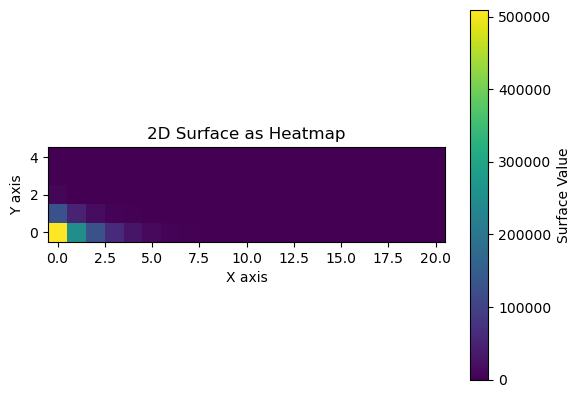

In [7]:
plt.imshow(surface, cmap='viridis', origin='lower')

# Add a color bar to indicate values
plt.colorbar(label='Surface Value')

# Add labels
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.title('2D Surface as Heatmap')
plt.show()

In [8]:
surface.max()

509541.4

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# # Generate X and Y coordinate arrays
# x = snrs  # Number of columns
# y = n_ints_sim # Number of rows
# x, y = np.meshgrid(x, y)   # Create a meshgrid

# # Create the plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface
# # z = surface / 
# surf = ax.plot_surface(x, y, z, cmap='viridis')

# # Add a color bar
# # fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# # ax.set_zscale('log')

# # Labels
# ax.set_xlabel('SNR Threshold')
# ax.set_ylabel('Number of Integrations')
# ax.set_zlabel('False Positives')

# plt.show()

SyntaxError: invalid syntax (3727684365.py, line 13)

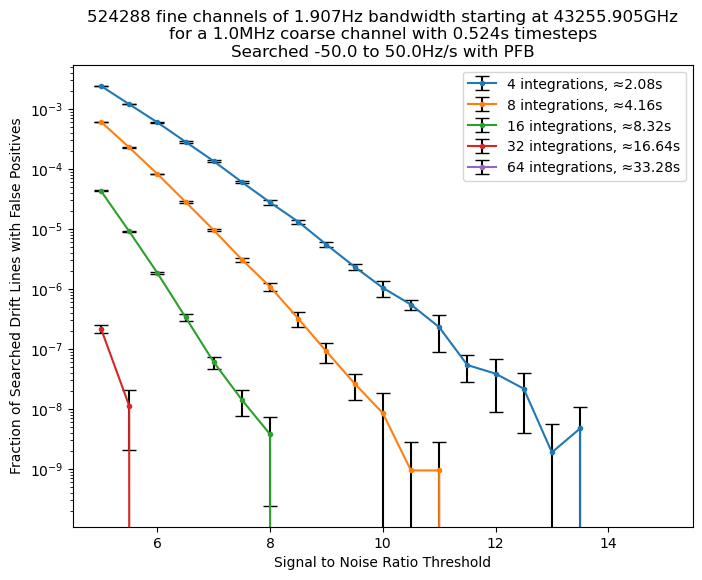

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
possible_signals_per_n_ints = [ 210_752_871, # 4 ints
                                210741766, # 8
                                210719555, # 16 ints
                                210675134, # 32
                                210586292] # 64
# colors = ['b', 'g','r', 'c', 'm']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd']
for i, n_ints in enumerate(n_ints_sim):
        denominator = possible_signals_per_n_ints[i]
        ax.errorbar(snrs, surface[i] / denominator, yerr=error[i] / denominator, marker='.', color=colors[i], ecolor='black', capsize=5, label=f"{n_ints} integrations, ≈{n_ints * 0.52}s")


plt.xlabel("Signal to Noise Ratio Threshold")
plt.ylabel("Fraction of Searched Drift Lines with False Positives")

# Params of run
n_fine = 2**19 # fine channels
drifts = np.arange(-50, 50.25, .25)
f_off = 1.9073486328125e-06 # fine channel spacing
t_samp = 0.524288 # len of integration
freq = 43255.90455616229 # freq of 1st channel
plt.title(f"{n_fine} fine channels of {round(f_off * 1e6, 3)}Hz bandwidth starting at {round(freq, 3)}GHz\n"
           f"for a {n_fine * f_off}MHz coarse channel with {round(t_samp,3)}s timesteps\n"
           f"Searched {min(drifts)} to {max(drifts)}Hz/s with PFB")

plt.yscale('log')
# plt.ylim([1e-15, None])

plt.legend()

plt.show()

In [21]:
results.shape

(5, 21, 5)

In [ ]:
results[4, :, :] # "purple" curve, for 64 integrations, has no false positives

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])